# TMA4320 - Øving 5, Iterative metoder

Dette er en liten øving som du burde kunne gjøre før du starter opp med Prosjekt 2.
Den bli veiledet i øvingstimen fredag 22.2, kl 9-10. Innleveringsfrist er fredag 1. mars.


**Oppgave 1** Vi skal løse et spesifikt ligningssystem
$$
     A \mathbf{u} = b,\quad A\in\mathbb{R}^{n\times n},\quad b\in\mathbb{R}^n
$$

med hensyn på $\mathbf{u}$ ved å bruke SOR-metoden. La $h=\frac{1}{n+1}$ og la $b_i=h^2f(x_i)$
der $f(x)$ er en funksjon definert på intervallet $x\in[0,1]$. Vi tenker oss at systemet stammer fra Poisson-problemet $-u''(x)=f(x)$ der den dobbelderiverte er erstattet med en differenseformel, og en bruker randverdier $u(0)=u(1)=0$.
Vi har da at

$$
A = \left[
\begin{array}{rrrrrrr}
2 & -1 & 0 &  \cdots & 0  \\
-1&  2 & -1    &   \ddots      & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots &\ddots & \ddots &\ddots & -1 \\
0 &\cdots & 0 & -1 & 2
\end{array} 
\right]
$$

Du kan bruke følgende verdier til å teste ut:

* $n=10$
* $f(x)=x$ som impliserer at den eksakte løsningen er $u(x) = \frac{1}{6}\,x\,(1-x^2)$ eller
$\mathbf{u}_i\,=\,ih\,(1-(ih)^2),\ i=1,\ldots,n$
* $\mathtt{tol}=$1e-5
* $\omega=1.2$
* $\mathtt{maxiter}=1000$
* $u_0=[0,\ldots,0]^T$ (numpy.zeros(n))

Bruk algoritmen beskrevet i boka på side 110 og bruk gjerne en funksjonsheader som nedenfor.
Bruk det enkle feilestimatet $\mathtt{est}=\|u^{(k+1)}-u^{(k)}\|$ (numpy.linalg.norm()).

**NB!** Du kan skrive funksjonen som *dedikert* til matrisen $A$, dvs funksjonen hardkoder at $A$ er gitt som ovenfor og behøver ikke å kunne brukes for en vilkårlig $A$.

**Kontrollspørsmål 1** Hvor mange iterasjoner trengs for å oppnå det spesifiserte stoppkriteriet ovenfor.
Denne gangen angir du ditt resultat (ikke flervalg).

**Oppgave 2** For tilfellet $n=30$, $f(x)=-\sin x\ln x$, $\mathtt{tol}=$1e-5, $u_0=[0,\ldots,0]^T$, prøv deg fram for å finne hvilken $\omega$ som gjør at iterasjonen konvergerer raskest.

**Kontrollspørsmål 2:** Angi din optimale $\omega$ med 2 gjeldende siffer (dvs f.eks. 1.3). Du kan nøye deg med å søke etter $\omega$-verdier i intervallet $[1,2]$. Her angir du også verdi (ikke flervalg).


**Godkjenningskrav**
En Jupyter notebook fil med funksjon som implementerer SOR-metoden som spesifisert skal lastes opp i Bb og det skal svares på kontrollspørsmål.



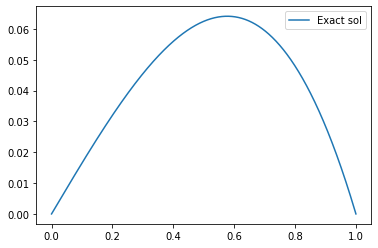

2.220446049250313e-16
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


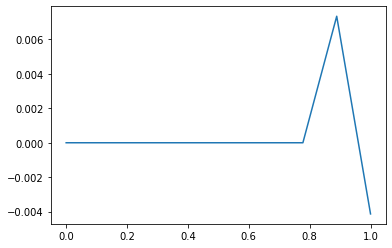

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import warnings 
#warnings.filterwarnings("ignore")

def Poisson(omega,f,u0,tol,maxiter):
    '''
    Compute the solution to Poisson's equation in 1D by means of the SOR method. 
    Return the computed solution u.
    omega: Value of the relaxation parameter in SOR
    f: The right hand side of the Poisson equation as in -u''(x) = f(x)
    u0: The initial value for the iteration
    tol: The tolerance to be used in the stopping criterion (est < tol)
    maxiter: The maximum number of iterations
    
    '''
    eps = np.finfo("float").eps
    print(eps)
    #Constructs array A in the given shape
    n = 10
    diagonal = np.zeros(n)
    diagonal.fill(2)
    udiagonal = np.zeros(n-1)
    udiagonal.fill(-1)
    diagonals = [udiagonal, diagonal, udiagonal]
    A = diags(diagonals, [-1,0,1]).toarray()
    print(A)
    
    
    np.where(A==0, eps, A) #Prøver å bytte ut alle 0-verdier med eps, som er minste verdi (precision) på maskinen. 
    #print(A)
    
    #Comstruct b . is this the way to do it?
    h = 1/(1+n)
    x = np.linspace(0,1,n)
    b = np.full(n, (-h**2*f(x))) #UIsikker på om det er sånn b skal lages?
    
    k = 0
    est = 2*tol
    while est > tol:
        k += 1
        dividend = omega*np.tril(A, -1)+np.diag(np.diag(A))
        u = ((1-omega)*np.diag(np.diag(A))*u0-omega*np.triu(A, 1)*u0)/dividend + omega*b/dividend
        u = np.nan_to_num(u) #Sleipt triks!
        est = np.linalg.norm(u-u0)
        if k > maxiter:
            break;
        u0 = u #Moves the iteration along
    return u

def f(x):
    return x

def u(x):
    ''' Exact solution '''
    return (1/6)*x*(1-x**2)

u0 = np.ones(10)
x = np.linspace(0,1,1000)
plt.plot(x, u(x), label="Exact sol")
plt.legend()
plt.show()

omega = 1.2
tol = 1e-5
maxiter = 1000
u = Poisson(omega, f, u0, tol, maxiter) #Aner ikke om dette blir korrekt!?
#Jeg burde vel fått en vektor tilbake!?!?
x1 = np.linspace(0,1,10)
plt.plot(x1, u[-1])

#Skjønner ikke dette helt!